In [1]:
#PROBLEM STATEMENT 3 
from pyspark.sql import SparkSession

In [2]:
from pyspark import SparkConf,SparkContext

In [3]:
from pyspark.sql import SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [4]:
spark = SparkSession.builder.appName("census_data").getOrCreate()

In [5]:
#Load data using PySpark
census_df = spark.read.csv('hdfs://nameservice1/user/edureka_997734/censusdata.csv', header = True)

In [6]:
#Perform Exploratory Data Analysis (EDA) and Data Cleaning based on the following points:
#Find the shape and schema of the dataset
#Schema
census_df.printSchema()

root
 |-- age: string (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: string (nullable = true)
 |-- capital_loss: string (nullable = true)
 |-- hours_per_week: string (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [7]:
#Shape 
print((census_df.count(), len(census_df.columns)))

(92561, 15)


In [8]:
#Obtain insights (statistics) of different column
census_df.describe().toPandas()

,summary,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,count,92561,92561,92561,92561,92561,92561,92561,92561,92561,92561,92561,92561,92561,92561,92561
1,mean,38.518069165199165,None,189542.36106999707,None,10.075236870820325,None,None,None,None,None,1046.2974362852606,87.93313598599842,40.433087369410444,None,None
2,stddev,13.622754122275927,None,105813.13085282373,None,2.5732149715644352,None,None,None,None,None,7220.801020868538,404.3217769832552,12.324730527252393,None,None
3,min,17,?,100009,10th,1,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
4,max,90,Without-pay,99987,Some-college,9,Widowed,Transport-moving,Wife,White,Male,99999,974,99,Yugoslavia,>50K


In [9]:
#Obtain the Unique values of Categorical Columns 
census_df.select("workclass").distinct().show()

+----------------+
|       workclass|
+----------------+
|Self-emp-not-inc|
|       Local-gov|
|       State-gov|
|         Private|
|     Without-pay|
|     Federal-gov|
|    Never-worked|
|               ?|
|    Self-emp-inc|
+----------------+



In [10]:
census_df.select("education").distinct().show()

+------------+
|   education|
+------------+
|     Masters|
|        10th|
|     5th-6th|
|  Assoc-acdm|
|   Assoc-voc|
|     7th-8th|
|         9th|
|     HS-grad|
|   Bachelors|
|        11th|
|     1st-4th|
|   Preschool|
|        12th|
|   Doctorate|
|Some-college|
| Prof-school|
+------------+



In [11]:
census_df.select("relationship").distinct().show()

+--------------+
|  relationship|
+--------------+
|     Own-child|
| Not-in-family|
|     Unmarried|
|          Wife|
|Other-relative|
|       Husband|
+--------------+



In [12]:
census_df.select("race").distinct().show()

+------------------+
|              race|
+------------------+
|             Other|
|Amer-Indian-Eskimo|
|             White|
|Asian-Pac-Islander|
|             Black|
+------------------+



In [13]:
census_df.select("native_country").distinct().show()

+------------------+
|    native_country|
+------------------+
|       Philippines|
|           Germany|
|          Cambodia|
|            France|
|            Greece|
|            Taiwan|
|           Ecuador|
|         Nicaragua|
|              Hong|
|              Peru|
|             China|
|             India|
|             Italy|
|Holand-Netherlands|
|              Cuba|
|             South|
|              Iran|
|           Ireland|
|          Thailand|
|              Laos|
+------------------+
only showing top 20 rows



In [14]:
#Check if any unwanted values are present in the data such as Null, ? or NaN
for col in census_df.columns:
    print(col, "\t", "with null values: ", census_df.filter(census_df[col].isNull()).count())


('age', '\t', 'with null values: ', 0)
('workclass', '\t', 'with null values: ', 0)
('fnlwgt', '\t', 'with null values: ', 0)
('education', '\t', 'with null values: ', 0)
('education_num', '\t', 'with null values: ', 0)
('marital_status', '\t', 'with null values: ', 0)
('occupation', '\t', 'with null values: ', 0)
('relationship', '\t', 'with null values: ', 0)
('race', '\t', 'with null values: ', 0)
('sex', '\t', 'with null values: ', 0)
('capital_gain', '\t', 'with null values: ', 0)
('capital_loss', '\t', 'with null values: ', 0)
('hours_per_week', '\t', 'with null values: ', 0)
('native_country', '\t', 'with null values: ', 0)
('income', '\t', 'with null values: ', 0)


In [15]:
for col in census_df.columns:
    print(col, "\t" , "with '?'values:",census_df.filter(census_df[col]=="?").count())

('age', '\t', "with '?'values:", 0)
('workclass', '\t', "with '?'values:", 5070)
('fnlwgt', '\t', "with '?'values:", 0)
('education', '\t', "with '?'values:", 0)
('education_num', '\t', "with '?'values:", 0)
('marital_status', '\t', "with '?'values:", 0)
('occupation', '\t', "with '?'values:", 5092)
('relationship', '\t', "with '?'values:", 0)
('race', '\t', "with '?'values:", 0)
('sex', '\t', "with '?'values:", 0)
('capital_gain', '\t', "with '?'values:", 0)
('capital_loss', '\t', "with '?'values:", 0)
('hours_per_week', '\t', "with '?'values:", 0)
('native_country', '\t', "with '?'values:", 1689)
('income', '\t', "with '?'values:", 0)


In [16]:
#Remove unwanted values if present in any of the columns (numerical as well as categorical columns)
from pyspark.sql.functions import*
census_df=census_df.replace('?',"na")

In [17]:
for col in census_df.columns:
    print(col, "\t" , "with '?'values:",census_df.filter(census_df[col]=="?").count())


('age', '\t', "with '?'values:", 0)
('workclass', '\t', "with '?'values:", 0)
('fnlwgt', '\t', "with '?'values:", 0)
('education', '\t', "with '?'values:", 0)
('education_num', '\t', "with '?'values:", 0)
('marital_status', '\t', "with '?'values:", 0)
('occupation', '\t', "with '?'values:", 0)
('relationship', '\t', "with '?'values:", 0)
('race', '\t', "with '?'values:", 0)
('sex', '\t', "with '?'values:", 0)
('capital_gain', '\t', "with '?'values:", 0)
('capital_loss', '\t', "with '?'values:", 0)
('hours_per_week', '\t', "with '?'values:", 0)
('native_country', '\t', "with '?'values:", 0)
('income', '\t', "with '?'values:", 0)


In [18]:
from pyspark.sql.functions import rand

In [19]:
#Obtain the relationship between different columns using covariance which shows the degree of interdependence of the two columns
df = sqlContext.range(0, 10).withColumn('age', rand(seed=10)).withColumn('income', rand(seed=27))
df.stat.cov('age', 'income')


0.05983805032757694

In [20]:
df = sqlContext.range(0, 10).withColumn('occupation', rand(seed=10)).withColumn('income', rand(seed=27))
df.stat.cov('occupation', 'income')

0.05983805032757693

In [21]:
df = sqlContext.range(0, 10).withColumn('education', rand(seed=10)).withColumn('workclass', rand(seed=27))
df.stat.cov('education', 'workclass')

0.05983805032757693

In [22]:
from pyspark.sql.functions import countDistinct

In [23]:
#Obtain distinct values and their counts in categorical columns.
census_df.select(countDistinct("workclass")).show()

+-------------------------+
|count(DISTINCT workclass)|
+-------------------------+
|                        9|
+-------------------------+



In [24]:
census_df.select(countDistinct("occupation")).show()

+--------------------------+
|count(DISTINCT occupation)|
+--------------------------+
|                        15|
+--------------------------+



In [25]:
census_df.select(countDistinct("education")).show()

+-------------------------+
|count(DISTINCT education)|
+-------------------------+
|                       16|
+-------------------------+



In [26]:
census_df.select(countDistinct("race")).show()

+--------------------+
|count(DISTINCT race)|
+--------------------+
|                   5|
+--------------------+



In [27]:
census_df.select(countDistinct("marital_status")).show()

+------------------------------+
|count(DISTINCT marital_status)|
+------------------------------+
|                             7|
+------------------------------+



In [28]:
census_df.select(countDistinct("native_country")).show()

+------------------------------+
|count(DISTINCT native_country)|
+------------------------------+
|                            42|
+------------------------------+



In [29]:
#Create a crosstab on two different columns (example, age & workclass)
census_df.crosstab('age','workclass').show()

+-------------+-----------+---------+------------+-------+------------+----------------+---------+-----------+---+
|age_workclass|Federal-gov|Local-gov|Never-worked|Private|Self-emp-inc|Self-emp-not-inc|State-gov|Without-pay| na|
+-------------+-----------+---------+------------+-------+------------+----------------+---------+-----------+---+
|           45|         82|      179|           0|   1401|         115|             183|      105|          0| 27|
|           34|         65|      159|           0|   1796|          62|             193|      108|          0| 77|
|           67|          7|       31|           0|    150|          37|              78|       14|          2| 92|
|           66|          5|       38|           0|    191|          32|              59|       10|          0|100|
|           51|         83|      167|           0|   1082|         100|             208|       53|          0| 48|
|           84|          0|        7|           0|     10|           1|         

In [30]:
census_df.crosstab('education','income').show()

+----------------+-----+----+
|education_income|<=50K|>50K|
+----------------+-----+----+
|    Some-college|16766|3893|
|            10th| 2444| 164|
|         1st-4th|  475|  18|
|       Assoc-voc| 2943|1031|
|       Preschool|  140|   0|
|             9th| 1373|  87|
|         HS-grad|25164|4700|
|         5th-6th|  901|  49|
|         7th-8th| 1723| 126|
|            11th| 3245| 179|
|         Masters| 2172|2737|
|     Prof-school|  431|1191|
|            12th| 1147| 106|
|       Doctorate|  294| 849|
|       Bachelors| 8966|6316|
|      Assoc-acdm| 2224| 707|
+----------------+-----+----+



In [31]:
#Perform an “Integer Type Check” on the columns of the Spark DataFrame and display the columns satisfying the same
dict(census_df.dtypes)["age"]

'string'

In [32]:
dict(census_df.dtypes)["occupation"]

'string'

In [33]:
dict(census_df.dtypes)["education_num"]

'string'

In [34]:
dict(census_df.dtypes)["income"]

'string'

In [35]:
dict(census_df.dtypes)["marital_status"]

'string'

In [36]:
dict(census_df.dtypes)["capital_gain"]

'string'

In [37]:
dict(census_df.dtypes)["capital_loss"]

'string'

In [38]:
dict(census_df.dtypes)["hours_per_week"]

'string'

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7135281890>,
      dtype=object)

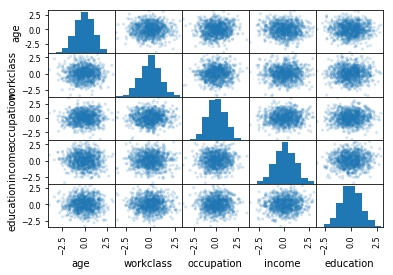

In [40]:
#Obtain correlation between the above columns using pandas scatter plot
df = pd.DataFrame(np.random.randn(1000, 5), columns=['age','workclass','occupation','income','education'])
pd.plotting.scatter_matrix(df, alpha=0.2)